In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cnx = sqlite3.connect('/home/nate/Desktop/fires/FPA_FOD_20170508.sqlite')

In [3]:
df = pd.read_sql_query("SELECT STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", cnx)

In [4]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [5]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday_name

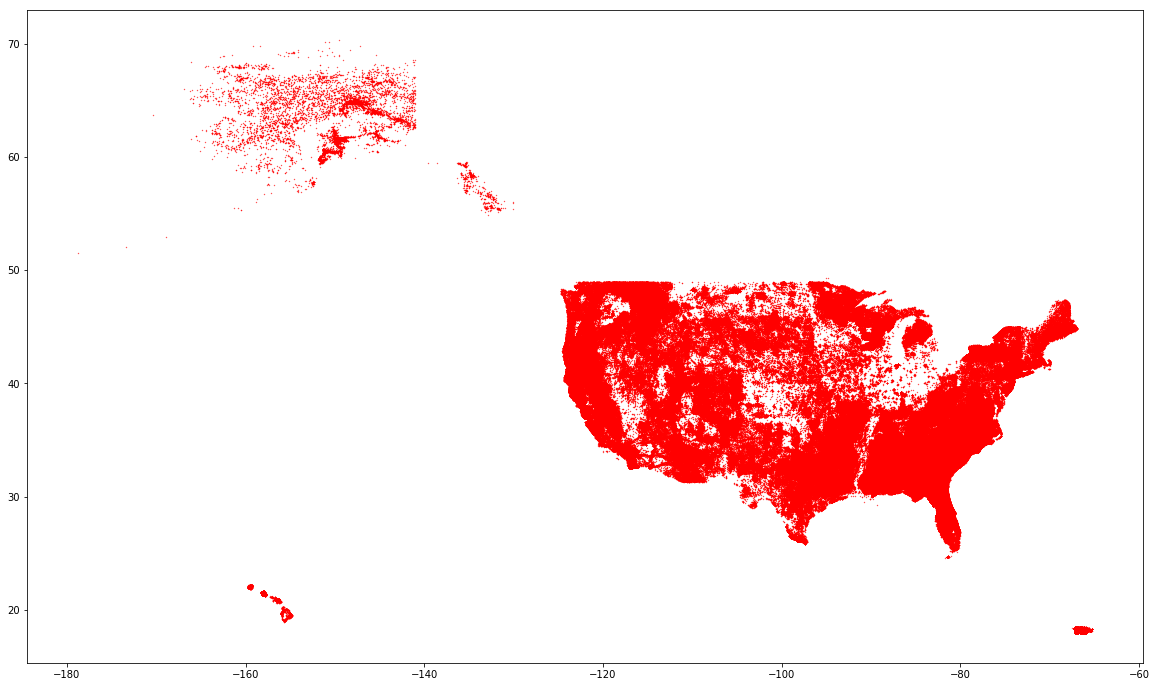

In [23]:
plt.figure(figsize=(20,12))

x=df['LONGITUDE']
y=df['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

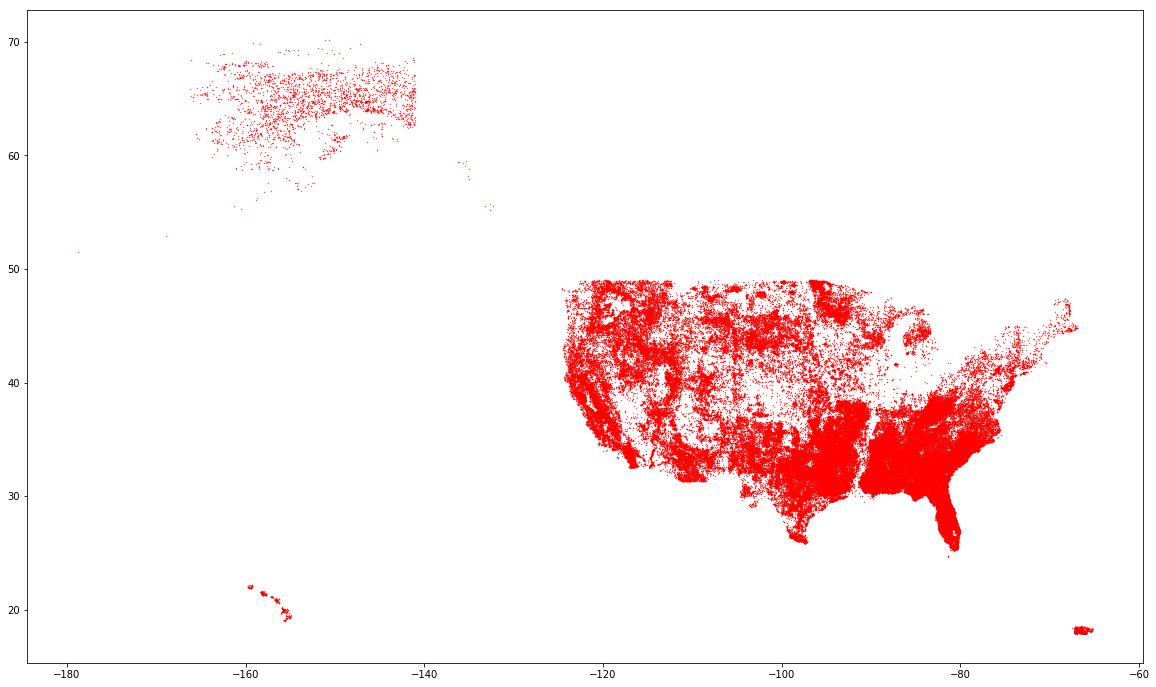

In [72]:
plt.figure(figsize=(20,12))

x=df[df['FIRE_SIZE'] > 10]['LONGITUDE']
y=df[df['FIRE_SIZE'] > 10]['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

# Stations

In [8]:
stations = pd.read_csv('/home/nate/Desktop/fires/stations.csv', delim_whitespace=True, names=[0])

In [9]:
stations['idx'] = stations.index
stations.head()

,,,,,,,0,idx
ACW00011604,17.1167,-61.7833,10.1,ST,JOHNS,COOLIDGE,FLD,"(ACW00011604, 17.1167, -61.7833, 10.1, ST, JOH..."
ACW00011647,17.1333,-61.7833,19.2,ST,JOHNS,NaN,NaN,"(ACW00011647, 17.1333, -61.7833, 19.2, ST, JOH..."
AE000041196,25.3330,55.5170,34.0,SHARJAH,INTER.,AIRP,GSN,"(AE000041196, 25.333, 55.517, 34.0, SHARJAH, I..."
AEM00041194,25.2550,55.3640,10.4,DUBAI,INTL,41194,NaN,"(AEM00041194, 25.255, 55.364, 10.4, DUBAI, INT..."
AEM00041217,24.4330,54.6510,26.8,ABU,DHABI,INTL,41217,"(AEM00041217, 24.433, 54.651, 26.8, ABU, DHABI..."


In [10]:
stations.iloc[0][1][0]

'ACW00011604'

In [11]:
code = []
lat = []
lon = []
for idx, row in stations.iterrows():
    code.append(row[1][0])
    lat.append(row[1][1])
    lon.append(row[1][2])

In [12]:
clean_stations = pd.DataFrame(code, columns=['code'])

In [13]:
clean_stations['lat'] = lat
clean_stations['lon'] = lon

In [15]:
clean_stations.head()

,code,lat,lon
0,ACW00011604,17.1167,-61.7833
1,ACW00011647,17.1333,-61.7833
2,AE000041196,25.3330,55.5170
3,AEM00041194,25.2550,55.3640
4,AEM00041217,24.4330,54.6510


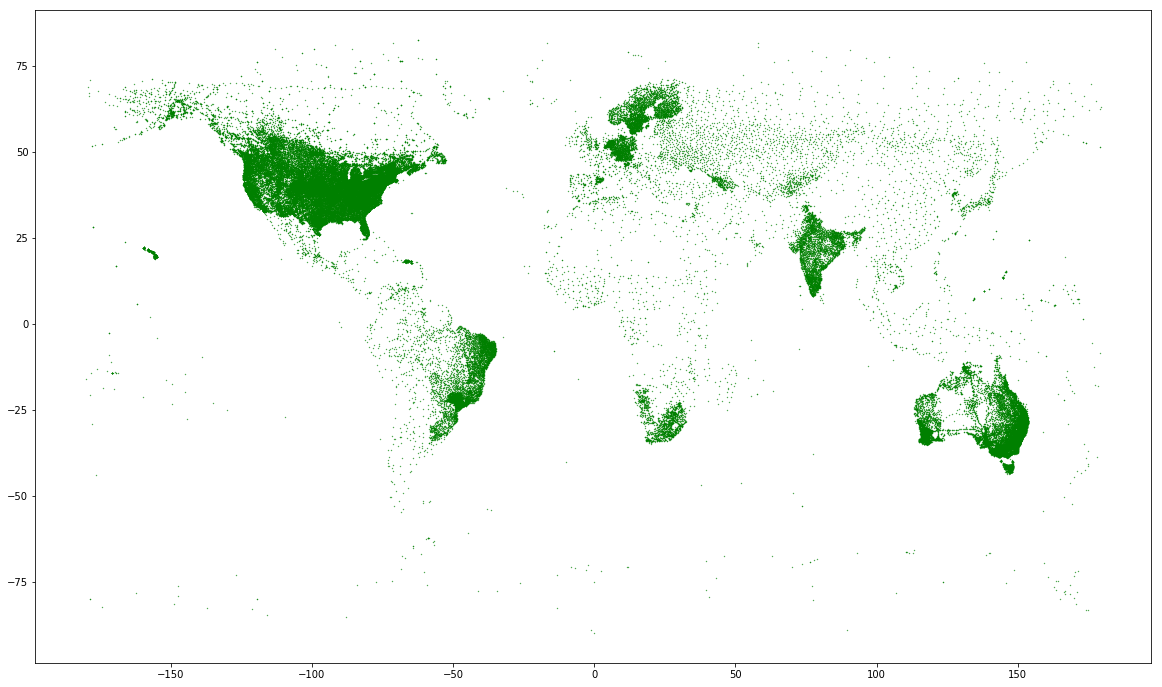

In [22]:
plt.figure(figsize=(20,12))

x=clean_stations['lon']
y=clean_stations['lat']

plt.scatter(x,y,color='g',s=0.1)

plt.show()

In [20]:
accept_stations = []

for idx, row in clean_stations.iterrows():
    if row[2] < -60:
        if row[1] > 15:
            accept_stations.append(idx)
    else:
        pass

In [39]:
len(accept_stations)

66278

In [25]:
murica_stations = pd.DataFrame(columns=['code', 'lat', 'lon'])

In [36]:
for idx, row in clean_stations.iterrows():
    if idx in accept_stations:
        murica_stations.append(clean_stations.iloc[idx])
    else:
        pass

In [48]:
murica_lon = []
murica_lat = []

for idx, row in clean_stations.iterrows():
    if idx in accept_stations:
        murica_lon.append(clean_stations.iloc[idx][2])
        murica_lat.append(clean_stations.iloc[idx][1])

In [49]:
len(murica_lon)

66278

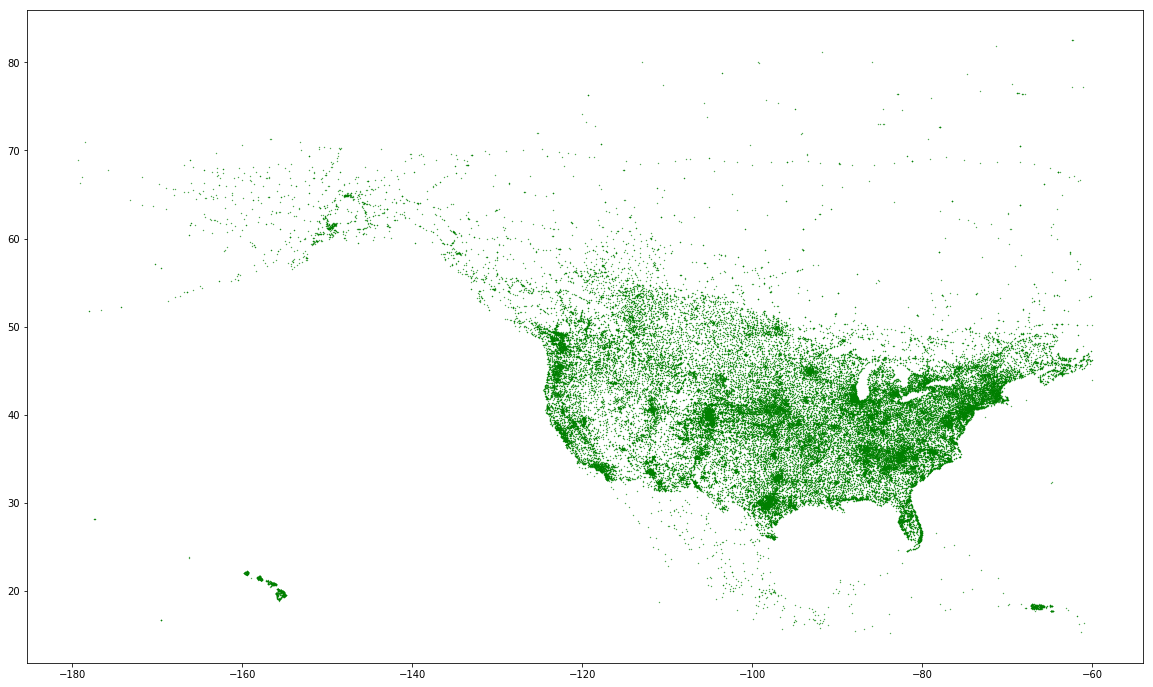

In [50]:
plt.figure(figsize=(20,12))

x=murica_lon
y=murica_lat

plt.scatter(x,y,color='g',s=0.1)

plt.show()

# More Fire

In [60]:
df_orig = df.copy()

In [84]:
df_orig = df_orig[df_orig['STATE'] == 'AK']
df_orig_big = df_orig[df_orig['FIRE_SIZE'] > 100]

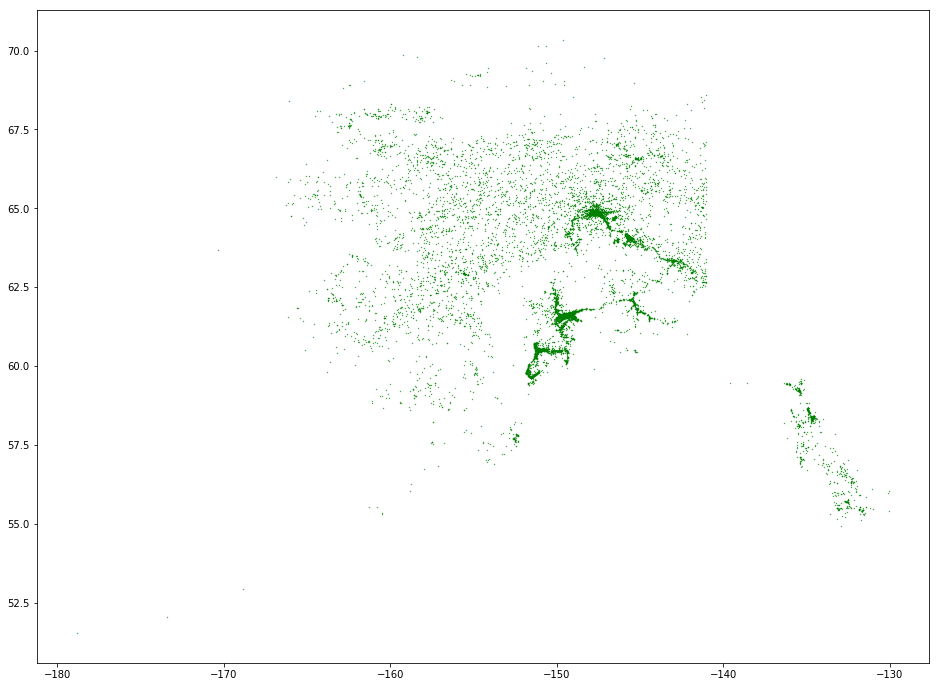

In [77]:
plt.figure(figsize=(16,12))

x=df_orig['LONGITUDE']
y=df_orig['LATITUDE']

plt.scatter(x,y,color='g',s=0.1)

plt.show()

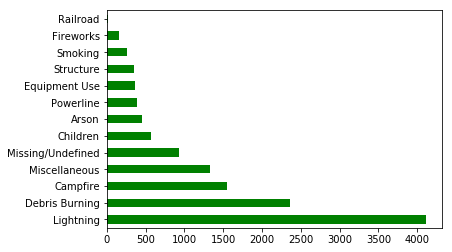

In [80]:
df_orig['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='g')
plt.show()

<Container object of 24 artists>

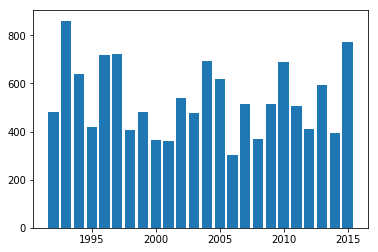

In [79]:
years = pd.Series.to_frame(df_orig['YEAR'].value_counts()).sort_index()

plt.bar(years.index, years['YEAR'])

In [70]:
mth = list(df_orig['MONTH'])
yr = list(df_orig['YEAR'])

mthyr = []
for idx, m in enumerate(mth):
    mthyr.append(str(yr[idx]) + '-' + str(mth[idx]))

df_orig['MTHYR'] = mthyr

<Container object of 206 artists>

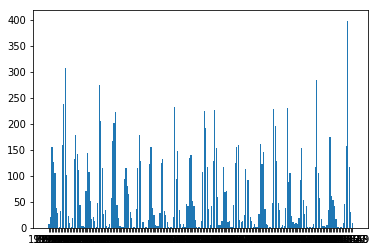

In [83]:
mthyears = pd.Series.to_frame(df_orig['MTHYR'].value_counts()).sort_index()

plt.bar(mthyears.index, mthyears['MTHYR'])

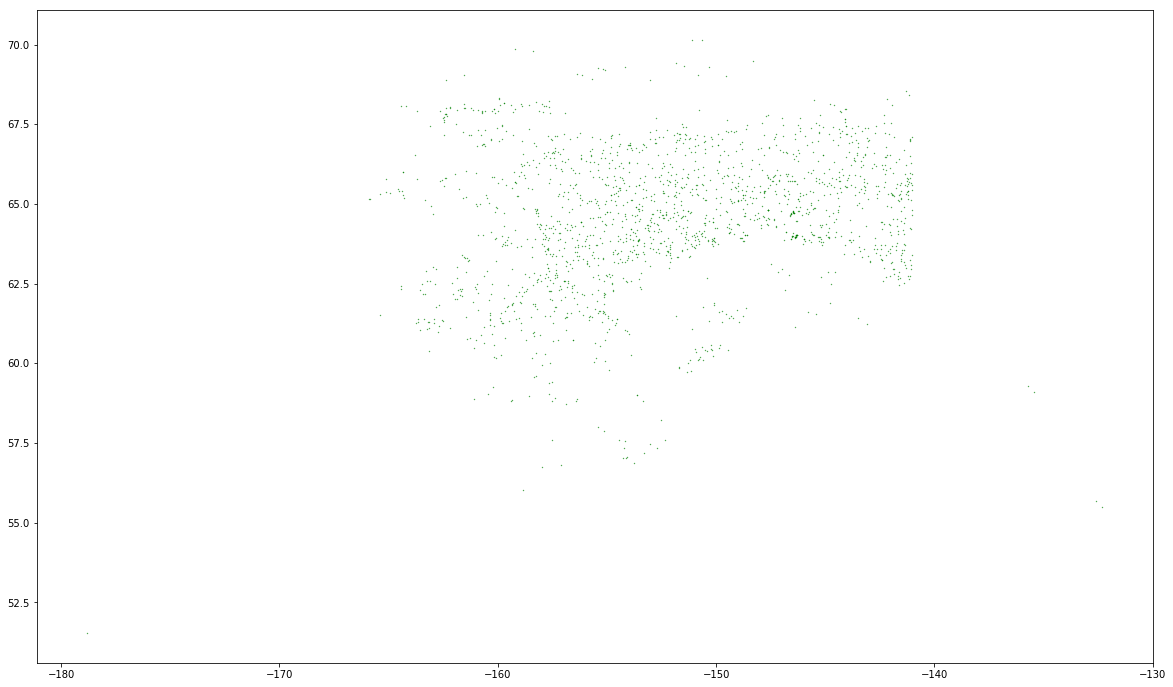

In [85]:
plt.figure(figsize=(20,12))

x=df_orig_big['LONGITUDE']
y=df_orig_big['LATITUDE']

plt.scatter(x,y,color='g',s=0.1)

plt.show()

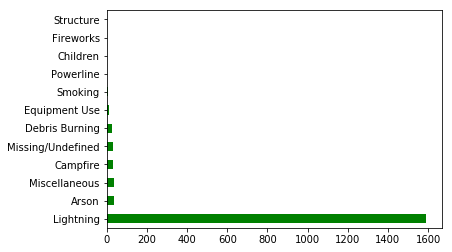

In [86]:
df_orig_big['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='g')
plt.show()

<Container object of 24 artists>

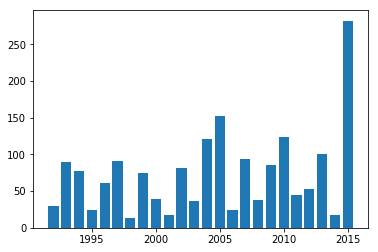

In [87]:
years = pd.Series.to_frame(df_orig_big['YEAR'].value_counts()).sort_index()

plt.bar(years.index, years['YEAR'])

In [88]:
mth = list(df_orig_big['MONTH'])
yr = list(df_orig_big['YEAR'])

mthyr = []
for idx, m in enumerate(mth):
    mthyr.append(str(yr[idx]) + '-' + str(mth[idx]))

df_orig_big['MTHYR'] = mthyr

/home/nate/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<Container object of 110 artists>

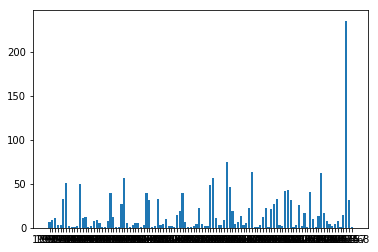

In [89]:
mthyears = pd.Series.to_frame(df_orig_big['MTHYR'].value_counts()).sort_index()

plt.bar(mthyears.index, mthyears['MTHYR'])

<Container object of 24 artists>

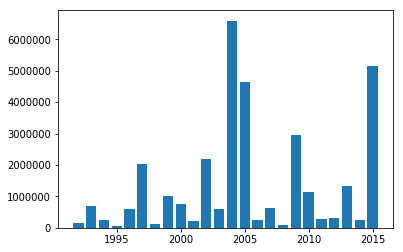

In [98]:
plt.bar(df_orig.groupby('YEAR').sum().index, df_orig.groupby('YEAR').sum()['FIRE_SIZE'])

<Container object of 24 artists>

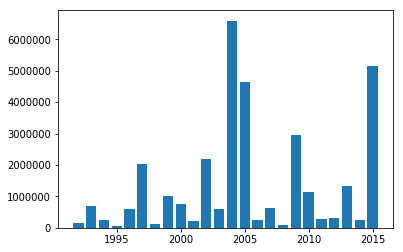

In [99]:
plt.bar(df_orig_big.groupby('YEAR').sum().index, df_orig_big.groupby('YEAR').sum()['FIRE_SIZE'])

In [107]:
np.mean((df_orig.groupby('YEAR').sum()['FIRE_SIZE'] - df_orig_big.groupby('YEAR').sum()['FIRE_SIZE'])/df_orig.groupby('YEAR').sum()['FIRE_SIZE'])

0.005041924032120097

on average, fires less than 100 acres in size in AK account half a percent of the area burned in a given year, max is ~3.3% in 1995